[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github.com/Tuchsanai/Pytorch_Einops_Image_demo/blob/main/Pytorch_Arrange_MultiImages.ipynb)


In [10]:
import torch
import numpy as np
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

loader   = transforms.Compose([   transforms.CenterCrop(512), transforms.ToTensor()])  
unloader = transforms.ToPILImage()

def tensor_to_PIL(tensor):
    image = tensor.cpu().clone()
    image = image.squeeze(0)
    image = unloader(image)
    return image


im1             = Image.open('cat.jpg').convert('RGB')
crop_im_tensor1 = loader(im1).unsqueeze(0)

im2             = Image.open('dog.jpg').convert('RGB')
crop_im_tensor2 = loader(im2).unsqueeze(0)


im3             = Image.open('car.jpg').convert('RGB')
crop_im_tensor3  = loader(im3).unsqueeze(0)




# display(tensor_to_PIL(crop_im_tensor1))
# display(tensor_to_PIL(crop_im_tensor2))
# display(tensor_to_PIL(crop_im_tensor3))



print(crop_im_tensor1.shape)
print(crop_im_tensor2.shape)
print(crop_im_tensor3.shape)


torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 512, 512])


# Create Combination image with first axis = 0

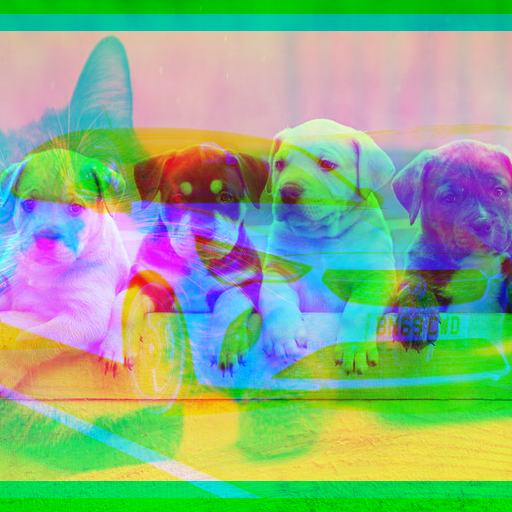

torch.Size([1, 3, 512, 512])

In [11]:
crop_im_tensor = torch.cat([crop_im_tensor1[:,0,:,:],crop_im_tensor2[:,0,:,:],crop_im_tensor3[:,0,:,:]],axis=0).unsqueeze(0)

display(tensor_to_PIL(crop_im_tensor))

crop_im_tensor.shape

# 0

In [12]:
import torch
from torch import nn, einsum
from einops import rearrange
from einops.layers.torch import Rearrange, Reduce

patch_size = 128

to_patch_embedding = nn.Sequential( Rearrange('b c (h p1) (w p2) -> b (p1 p2 c) (h w)', p1 = patch_size, p2 = patch_size) )
x                  = to_patch_embedding(crop_im_tensor)

x.shape

torch.Size([1, 49152, 16])

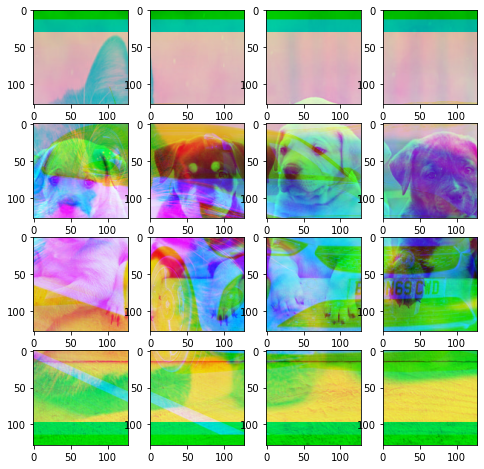

In [13]:
for k in range(16)  :
    i= k%16
    X=x[0,:,k].reshape(patch_size,patch_size,3)
    
    if i == 0 :
            fig = plt.figure(figsize = (8,8))
            ax = fig.add_subplot(4,4,i+1)
            ax.imshow(X.numpy())
    else :      
            ax = fig.add_subplot(4,4,i+1)
            ax.imshow(X.numpy())

    
    

# 1

In [14]:
import torch
from torch import nn, einsum
from einops import rearrange
from einops.layers.torch import Rearrange, Reduce

patch_size = 128

to_patch_embedding = nn.Sequential( Rearrange('b c (h p1) (w p2) -> b (p1 p2) (c h w)', p1 = patch_size, p2 = patch_size) )
x                  = to_patch_embedding(crop_im_tensor)

x.shape

torch.Size([1, 16384, 48])

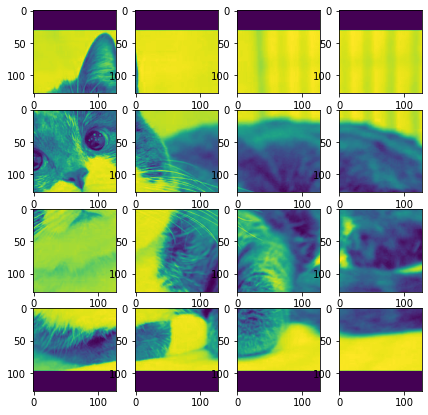

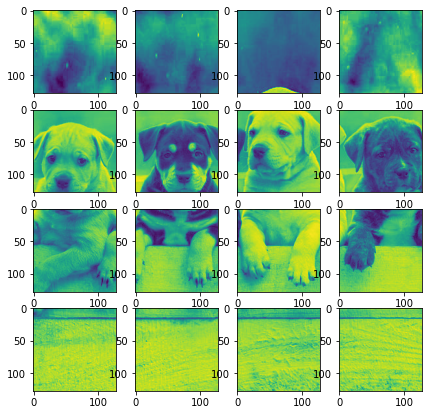

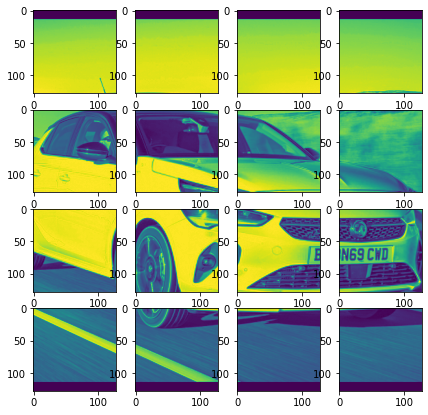

In [16]:
c,h,w = x.shape

for k in range(w)  :
    i= k%16
    X=x[0,:,k].reshape(patch_size,patch_size)
    
    if i == 0 :
            fig = plt.figure(figsize = (7,7))
            ax = fig.add_subplot(4,4,i+1)
            ax.imshow(X.numpy())
    else :      
            ax = fig.add_subplot(4,4,i+1)
            ax.imshow(X.numpy())


# 2

In [19]:
import torch
from torch import nn, einsum
from einops import rearrange
from einops.layers.torch import Rearrange, Reduce

patch_size = 128

to_patch_embedding = nn.Sequential( Rearrange('b c (h p1) (w p2) -> b (c h w) (p1 p2)', p1 = patch_size, p2 = patch_size) )
x                  = to_patch_embedding(crop_im_tensor)

x.shape

torch.Size([1, 48, 16384])

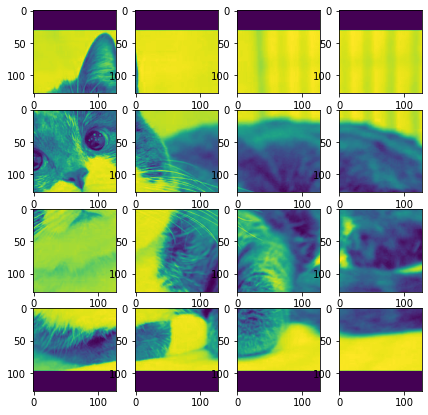

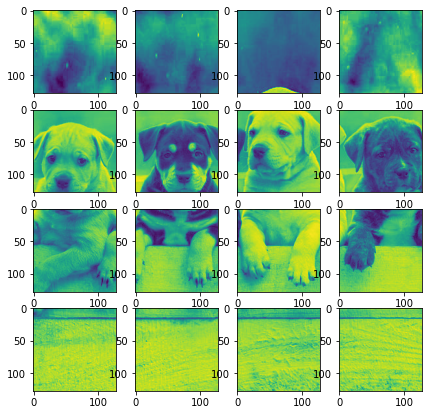

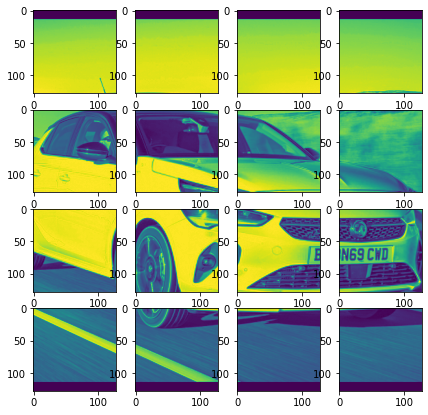

In [23]:
for k in range(48)  :
    i= k%16
    X=x[0,k,:].reshape(patch_size,patch_size)
    
    if i == 0 :
            fig = plt.figure(figsize = (7,7))
            ax = fig.add_subplot(4,4,i+1)
            ax.imshow(X.numpy())
    else :      
            ax = fig.add_subplot(4,4,i+1)
            ax.imshow(X.numpy())
